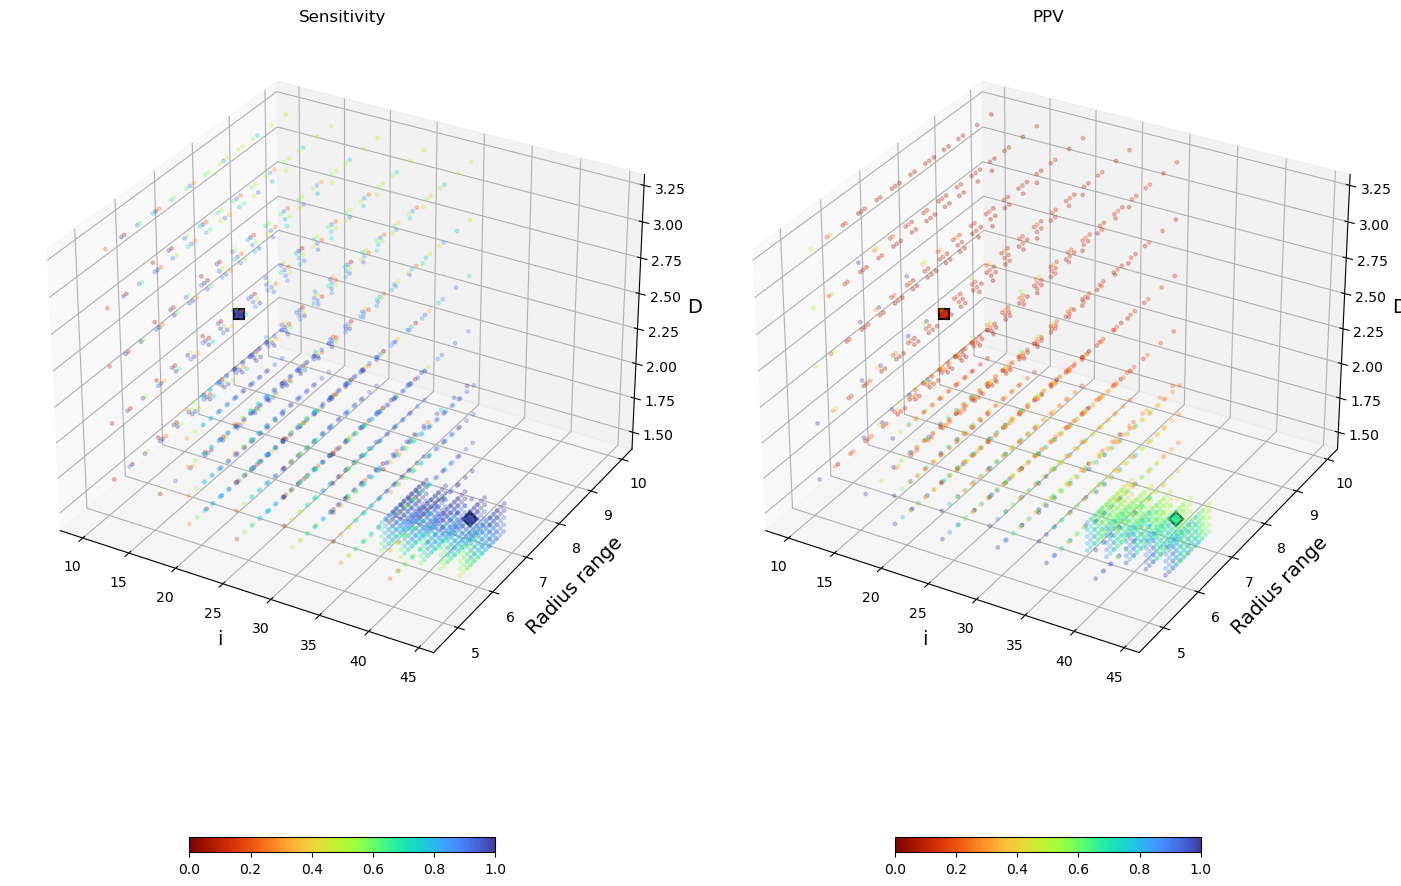

In [90]:
#!/usr/bin/python3 
# 3D Heatmap in Python using matplotlib 
  
# to make plot interactive 
%matplotlib inline
  
# importing required libraries 
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pylab import *
from matplotlib import colors
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
  
# reading a dummy dataset 
dataset = pd.read_csv("OptEval_all.csv")
dataset.fillna(0, inplace=True)

dataset['range'] = dataset['M']**1.3 - dataset['m']
  
# creating 3d figures 
fig = plt.figure(figsize=(15, 10)) 
ax1 = fig.add_subplot(121, projection='3d', facecolor='white')
ax2 = fig.add_subplot(122, projection='3d', facecolor='white')  
  
# configuring colorbar
cmap= plt.cm.turbo_r
cmap_colors = cmap(np.linspace(0, 1, 256))
ninty_five = round(len(cmap_colors)*0.94)
ninty_five = cmap_colors[:ninty_five]
cmap = colors.LinearSegmentedColormap.from_list('ninty_five', ninty_five)

color_map = plt.cm.ScalarMappable(cmap=cmap) 
color_map.set_array(colo) 

dataset['sens_color'] = cmap(dataset["Sens"]).tolist()
dataset['PPV_color'] = cmap(dataset["PPV"]).tolist()

# dataset.loc[(dataset['m'] == 3.0) &
#             (dataset['M'] == 5.7) &
#             (dataset['i'] == 42) &
#             (dataset['D'] == 1.65), 'alpha'] = 1.0

# dataset.loc[(dataset['m'] == 3.0) &
#             (dataset['M'] == 5.7) &
#             (dataset['i'] == 42) &
#             (dataset['D'] == 1.65), 'size'] = 1000

  
# creating the heatmap 
img1 = ax1.scatter(dataset['i'], dataset['range'], dataset['D'], marker='.',  
                 s=25, c=dataset['sens_color'], alpha=0.25) 

img2 = ax2.scatter(dataset['i'], dataset['range'], dataset['D'], marker='.',  
                 s=25, c=dataset['PPV_color'], alpha=0.25) 

  
# adding title and labels 
ax1.set_title("Sensitivity") 
ax1.set_xlabel('i', size=14) 
ax1.set_ylabel('Radius range', size=14) 
ax1.set_zlabel('D', size=14) 

ax2.set_title("PPV") 
ax2.set_xlabel('i', size=14) 
ax2.set_ylabel('Radius range', size=14) 
ax2.set_zlabel('D', size=14) 

# Highlight default points
default_sens_color = dataset.loc[(dataset['i'] == 15) & (dataset['range'] == (6.2**1.3 - 3.4)) & (dataset['D'] == 2.4), 'sens_color'].values[0]
default_ppv_color = dataset.loc[(dataset['i'] == 15) & (dataset['range'] == (6.2**1.3 - 3.4)) & (dataset['D'] == 2.4), 'PPV_color'].values[0]
ax1.plot(15, (6.2**1.3 - 3.4), 2.4, marker='s', alpha=1, markersize=7, color=default_sens_color, markeredgecolor='black', markeredgewidth=1.5) 
ax2.plot(15, (6.2**1.3 - 3.4), 2.4, marker='s', alpha=1, markersize=7, color=default_ppv_color, markeredgecolor='black', markeredgewidth=1.5) 

# Highlight optimized points
opt_sens_color = dataset.loc[(dataset['i'] == 42) & (dataset['range'] == (5.7**1.3 - 3.0)) & (dataset['D'] == 1.65), 'sens_color'].values[0]
opt_ppv_color = dataset.loc[(dataset['i'] == 42) & (dataset['range'] == (5.7**1.3 - 3.0)) & (dataset['D'] == 1.65), 'PPV_color'].values[0]
ax1.plot(42, (5.7**1.3 - 3.0), 1.65, marker='D', alpha=1, markersize=7, color=opt_sens_color, markeredgecolor='black', markeredgewidth=1.5) 
ax2.plot(42, (5.7**1.3 - 3.0), 1.65, marker='D', alpha=1, markersize=7, color=opt_ppv_color, markeredgecolor='black', markeredgewidth=1.5) 

  
# displaying plot
# plt.colorbar(color_map)

plt.colorbar(color_map, orientation='horizontal', ax=ax1, shrink=0.4)
plt.colorbar(color_map, orientation='horizontal', ax=ax2, shrink=0.4)

plt.savefig('heatmap_sens_ppv.svg', dpi=900)

plt.show() 